# LSS Intrinsic Compton-Y

In [1]:
"""
    TITLE   : Calculating the Spectral Distortions
    PROJECT : Cosmic Conchometer
""";

__author__ = 'Nathaniel Starkman'
__version__ = 'Aug 29, 2020'

<span style='font-size:30px;font-weight:650'>
    About
</span>




<br><br>

- - - 


## Prepare

### Imports

In [2]:
from utilipy import ipython
ipython.run_imports(base=True, astropy=True, matplotlib=True, extended=True)
ipython.set_autoreload(2)

# BUILT-IN

import configparser
import typing as T


# THIRD PARTY

from classy import Class
import matplotlib.pyplot as plt

import scipy.integrate as integ
from scipy.interpolate import InterpolatedUnivariateSpline as IUS


# PROJECT-SPECIFIC

import cosmic_conchometer as cc


set autoreload to 1
set autoreload to 2


## Parameters

### CLASS computations

In [3]:
config = configparser.ConfigParser()
config.optionxform = str 
config.read("input/parameters.ini")

params = cc.utils.flatten_dict(config._sections.copy())

['input/parameters.ini']

In [4]:
# Create an instance of the CLASS wrapper
class_cosmo = Class()
# Set the parameters to the cosmological code
class_cosmo.set(params)
# Run the whole code. Depending on your output, it will call the
# CLASS modules more or less fast. For instance, without any
# output asked, CLASS will only compute background quantities,
# thus running almost instantaneously.
# This is equivalent to the beginning of the `main` routine of CLASS,
# with all the struct_init() methods called.
class_cosmo.compute()

# thermodynamics
thermo = class_cosmo.get_thermodynamics()

True

# Cosmology

TODO make cosmology the same as CLASS cosmology or vice versa

In [5]:
cosmology.default_cosmology.set("Planck18_arXiv_v2")
cosmo = cosmology.default_cosmology.get()
cosmo

<ScienceState default_cosmology: FlatLambdaCDM(name="Planck18_arXiv_v2", H0=67.7 km / (Mpc s), Om0=0.31, Tcmb0=2.725 K, Neff=3.05, m_nu=[0.   0.   0.06] eV, Ob0=0.049)>

FlatLambdaCDM(name="Planck18_arXiv_v2", H0=67.7 km / (Mpc s), Om0=0.31, Tcmb0=2.725 K, Neff=3.05, m_nu=[0.   0.   0.06] eV, Ob0=0.049)

Basic quantities

In [6]:
from cosmic_conchometer import intrinsic_y

sd = intrinsic_y.SpectralDistortion(
    cosmo,
    class_cosmo,
    AkFunc=cc.default_Ak.get(),
    integration_method=integ.quad
)
sd

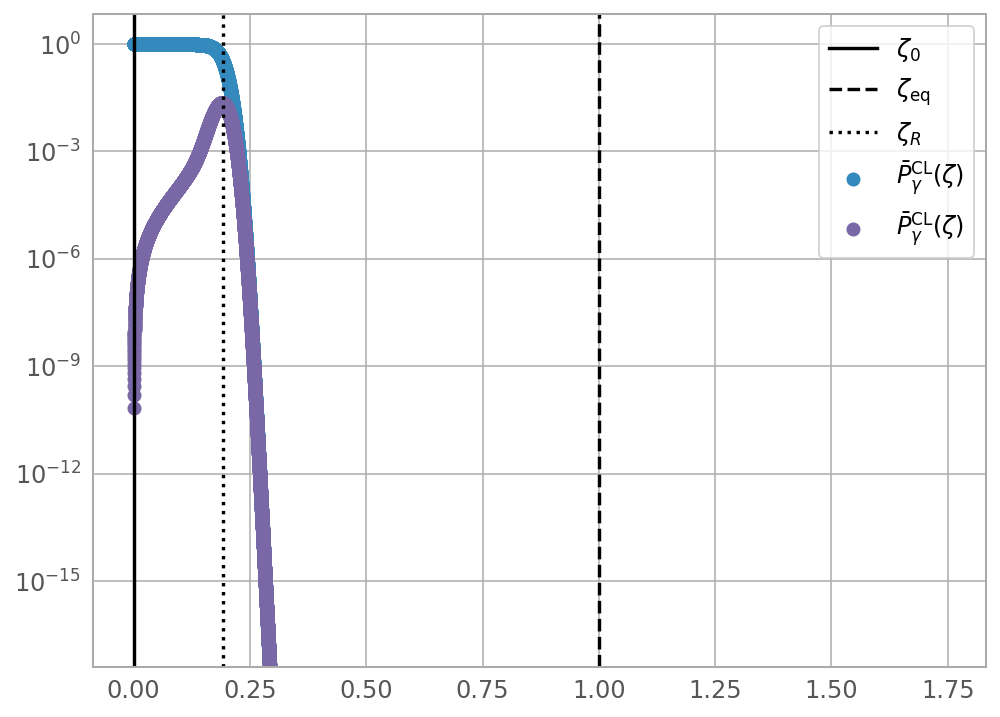

In [7]:
sd.plot_PgamBarCL(plot_times=True)
sd.plot_GgamBarCL()
plt.yscale("log")

<br><br>

- - - 


## Code

<br><br>

- - - 

<span style='font-size:40px;font-weight:650'>
    END
</span>